In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [6]:
img_gen = tf.keras.preprocessing.image.ImageDataGenerator(brightness_range=(0.5,1),rescale=1./255,validation_split=0.3)
img_gen_train = img_gen.flow_from_directory(
    directory = 'caltech-101-img',
    target_size = (224,224),
    batch_size = 16,
    subset = "training"
)
img_gen_valid = img_gen.flow_from_directory(
    directory = 'caltech-101-img',
    target_size = (224,224),
    batch_size = 16,
    subset = "validation"
)

Found 6444 images belonging to 102 classes.
Found 2700 images belonging to 102 classes.


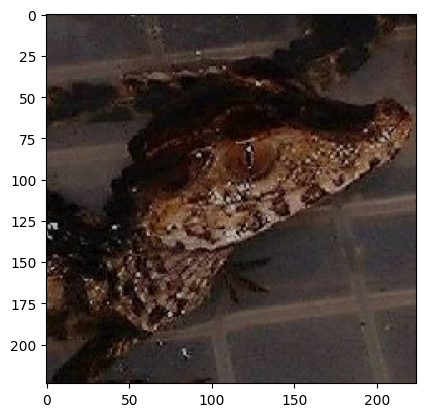

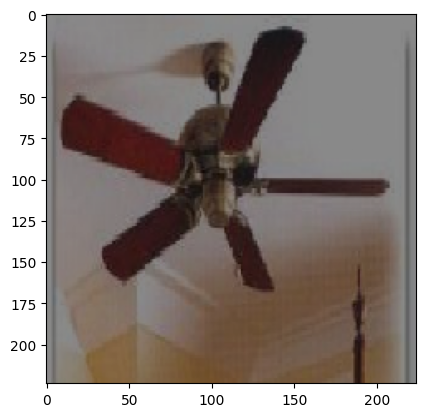

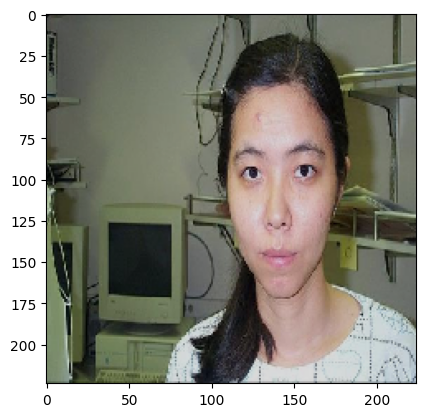

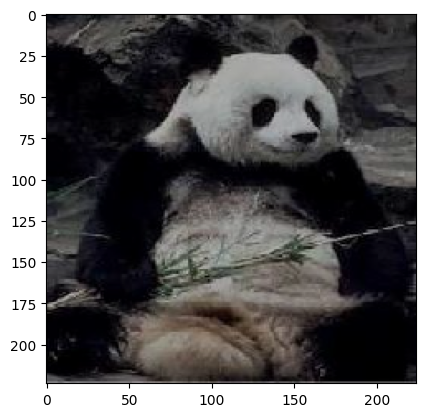

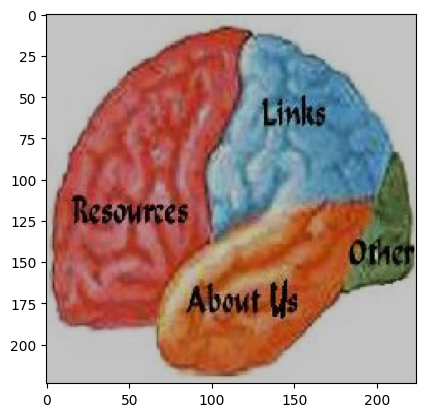

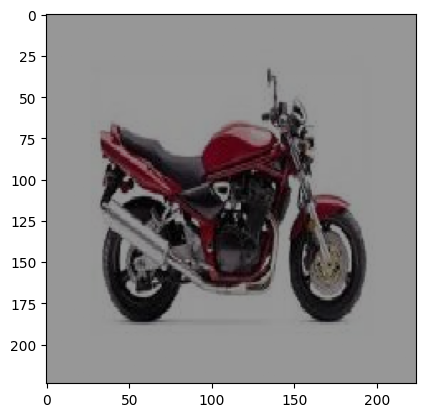

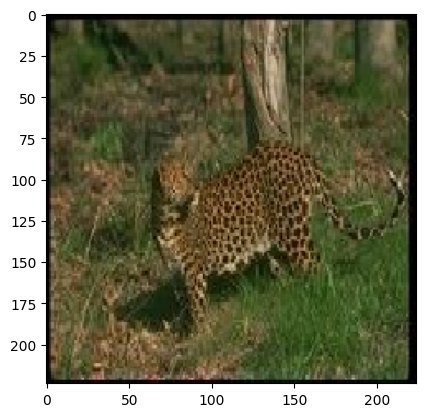

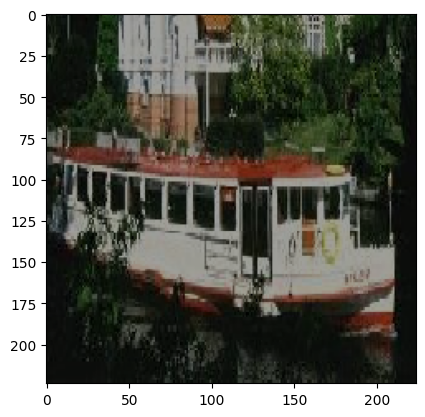

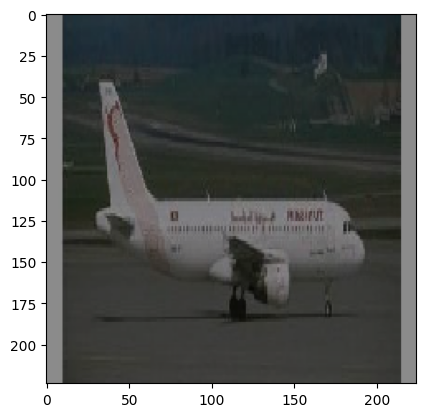

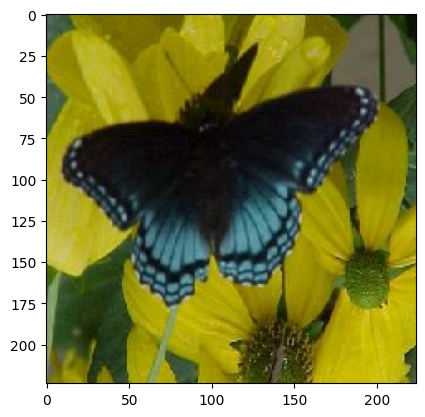

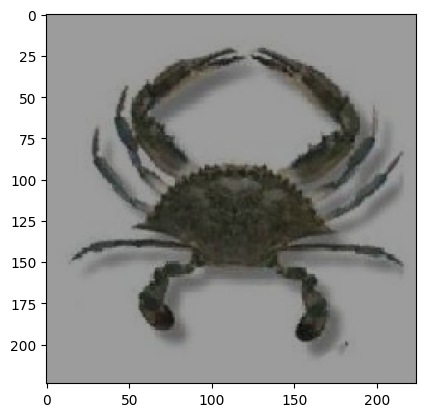

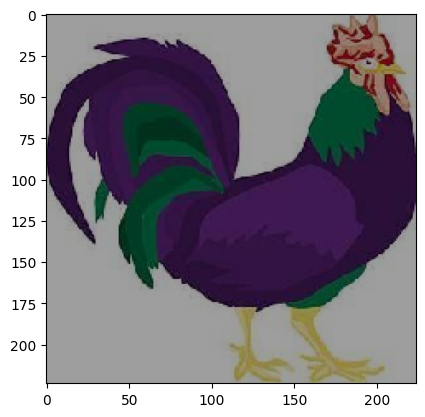

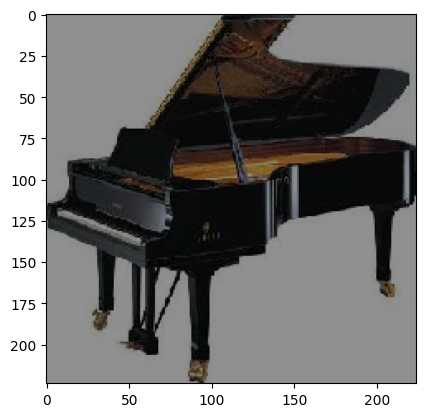

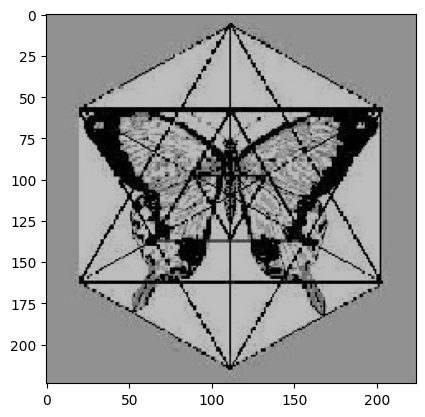

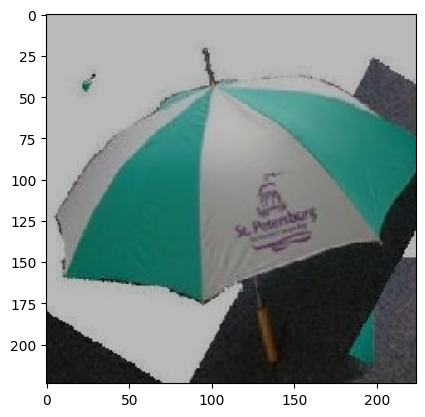

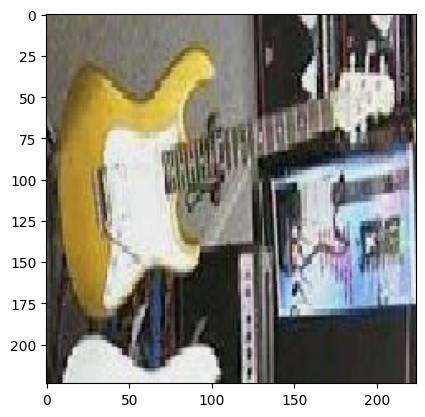

In [7]:
imgs,labels = next(iter(img_gen_train))
for img,label in zip(imgs,labels) :
    plt.imshow(img)
    plt.show()

In [8]:
base_model = tf.keras.applications.InceptionV3(weights="imagenet",include_top=False,input_shape=(224,224,3))

In [16]:
base_model.trainable = False
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(102,activation="softmax")
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 2, 2, 2048)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_1 (Dense)             (None, 102)               835686    
                                                                 
Total params: 22638470 (86.36 MB)
Trainable params: 835686 (3.19 MB)
Non-trainable params: 21802784 (83.17 MB)
_________________________________________________________________


In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()])
H = model.fit(img_gen_train,validation_data=img_gen_valid,steps_per_epoch=20,epochs=50)

Epoch 1/50
20/20 [==============================] - 98s 5s/step - loss: 6.3443 - categorical_accuracy: 0.4563 - val_loss: 4.0625 - val_categorical_accuracy: 0.5633
Epoch 2/50
20/20 [==============================] - 90s 5s/step - loss: 2.8599 - categorical_accuracy: 0.6750 - val_loss: 2.7878 - val_categorical_accuracy: 0.6789
Epoch 3/50
20/20 [==============================] - 86s 4s/step - loss: 2.2306 - categorical_accuracy: 0.7312 - val_loss: 3.1227 - val_categorical_accuracy: 0.6519
Epoch 4/50
20/20 [==============================] - 86s 4s/step - loss: 2.4072 - categorical_accuracy: 0.7688 - val_loss: 3.0682 - val_categorical_accuracy: 0.6722
Epoch 5/50
20/20 [==============================] - 86s 4s/step - loss: 2.1546 - categorical_accuracy: 0.7688 - val_loss: 2.1517 - val_categorical_accuracy: 0.7552
Epoch 6/50
20/20 [==============================] - 86s 5s/step - loss: 2.3337 - categorical_accuracy: 0.7969 - val_loss: 2.1980 - val_categorical_accuracy: 0.7537
Epoch 7/50
20/20

[]

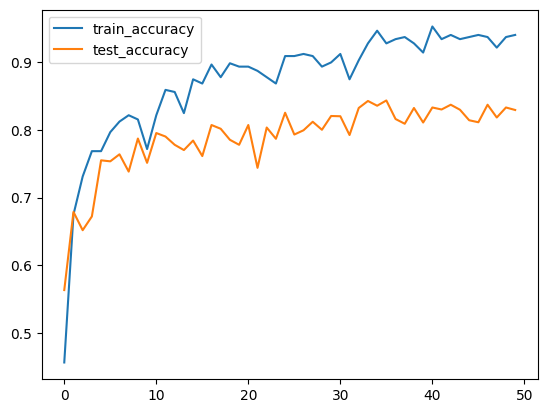

In [19]:
plt.plot(H.history['categorical_accuracy'],label='train_accuracy')
plt.plot(H.history['val_categorical_accuracy'],label='test_accuracy')
plt.legend()
plt.plot()

In [20]:
base_model.trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()])
H = model.fit(img_gen_train,validation_data=img_gen_valid,steps_per_epoch=2,epochs=50)

Epoch 1/50
2/2 [==============================] - 102s 81s/step - loss: 3.4636 - categorical_accuracy: 0.5625 - val_loss: 16.5189 - val_categorical_accuracy: 0.3193
Epoch 2/50
2/2 [==============================] - 82s 79s/step - loss: 6.5431 - categorical_accuracy: 0.4375 - val_loss: 23.9270 - val_categorical_accuracy: 0.1504
Epoch 3/50
2/2 [==============================] - 84s 82s/step - loss: 3.6471 - categorical_accuracy: 0.5938 - val_loss: 30.3979 - val_categorical_accuracy: 0.0611
Epoch 4/50
2/2 [==============================] - 83s 81s/step - loss: 7.0864 - categorical_accuracy: 0.2812 - val_loss: 30.3033 - val_categorical_accuracy: 0.0437
Epoch 5/50
2/2 [==============================] - 88s 86s/step - loss: 7.8344 - categorical_accuracy: 0.2812 - val_loss: 25.7409 - val_categorical_accuracy: 0.0415
Epoch 6/50
2/2 [==============================] - 88s 86s/step - loss: 7.5251 - categorical_accuracy: 0.2812 - val_loss: 31.1993 - val_categorical_accuracy: 0.0385
Epoch 7/50
2/2 

KeyboardInterrupt: 